# Exploratory Data Analysis Starter

## Import packages

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data (1).csv')
price_df = pd.read_csv('./price_data (1).csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [6]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [15]:
client_df.shape

(14606, 26)

In [16]:
price_df.shape

(193002, 8)

In [23]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [20]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [4]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

In [27]:
churn = client_df[['id', 'churn']]  #extract 'id' and 'churn'
churn.columns = ['Companies', 'churn']  #rename 'id' and 'churn' to 'Companies' and 'churn'
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

In [26]:
churn_percentage

,Companies
churn,
0,90.284814
1,9.715186


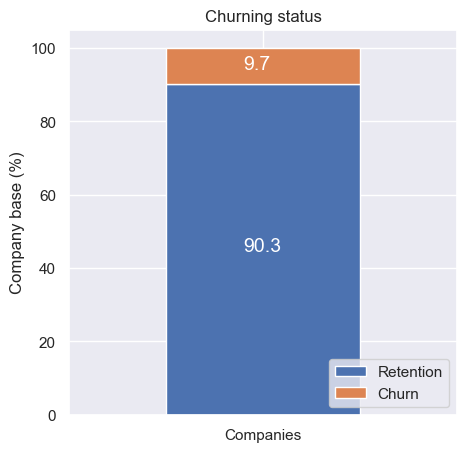

In [28]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

in total (base on id), about 10% of total customers have churned, it is imbalanced dataset, so in the modeling process, we need to handle this problem.

**Univariate Analysis**

There are a lot of outliers at the upper in the dataset and it is highly positive skewed. we'll address skewness and outliers in the feature engineering.

In [29]:
#to see the spread and skewness of the data (UNIVARIATE ANALYSIS)
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers

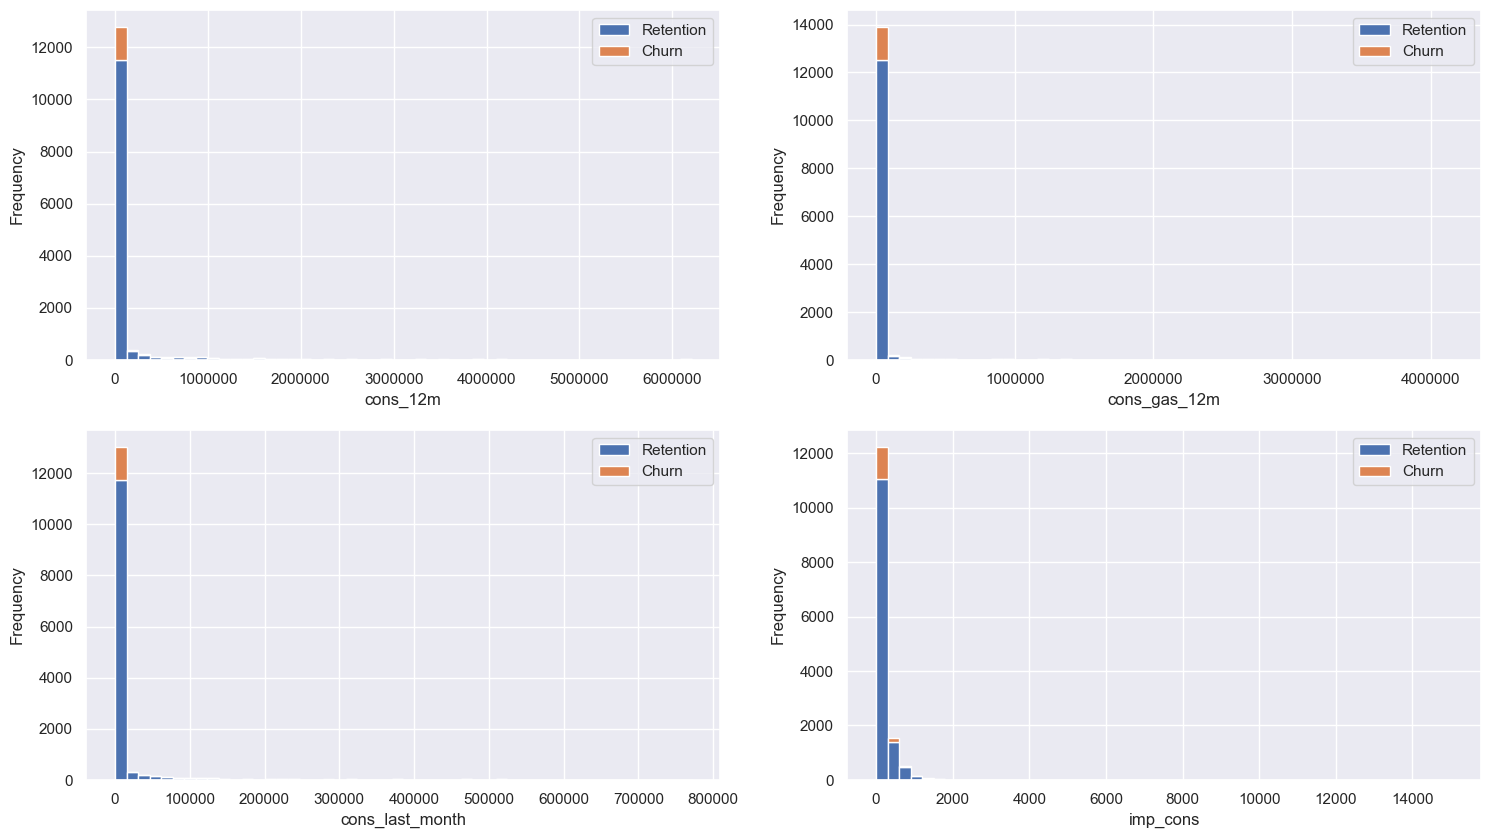

In [5]:
# comsumption
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

plot_distribution(consumption, 'cons_12m', axs[0,0])
plot_distribution(consumption, 'cons_gas_12m', axs[0,1])
plot_distribution(consumption, 'cons_last_month', axs[1,0])
plot_distribution(consumption, 'imp_cons', axs[1,1])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values

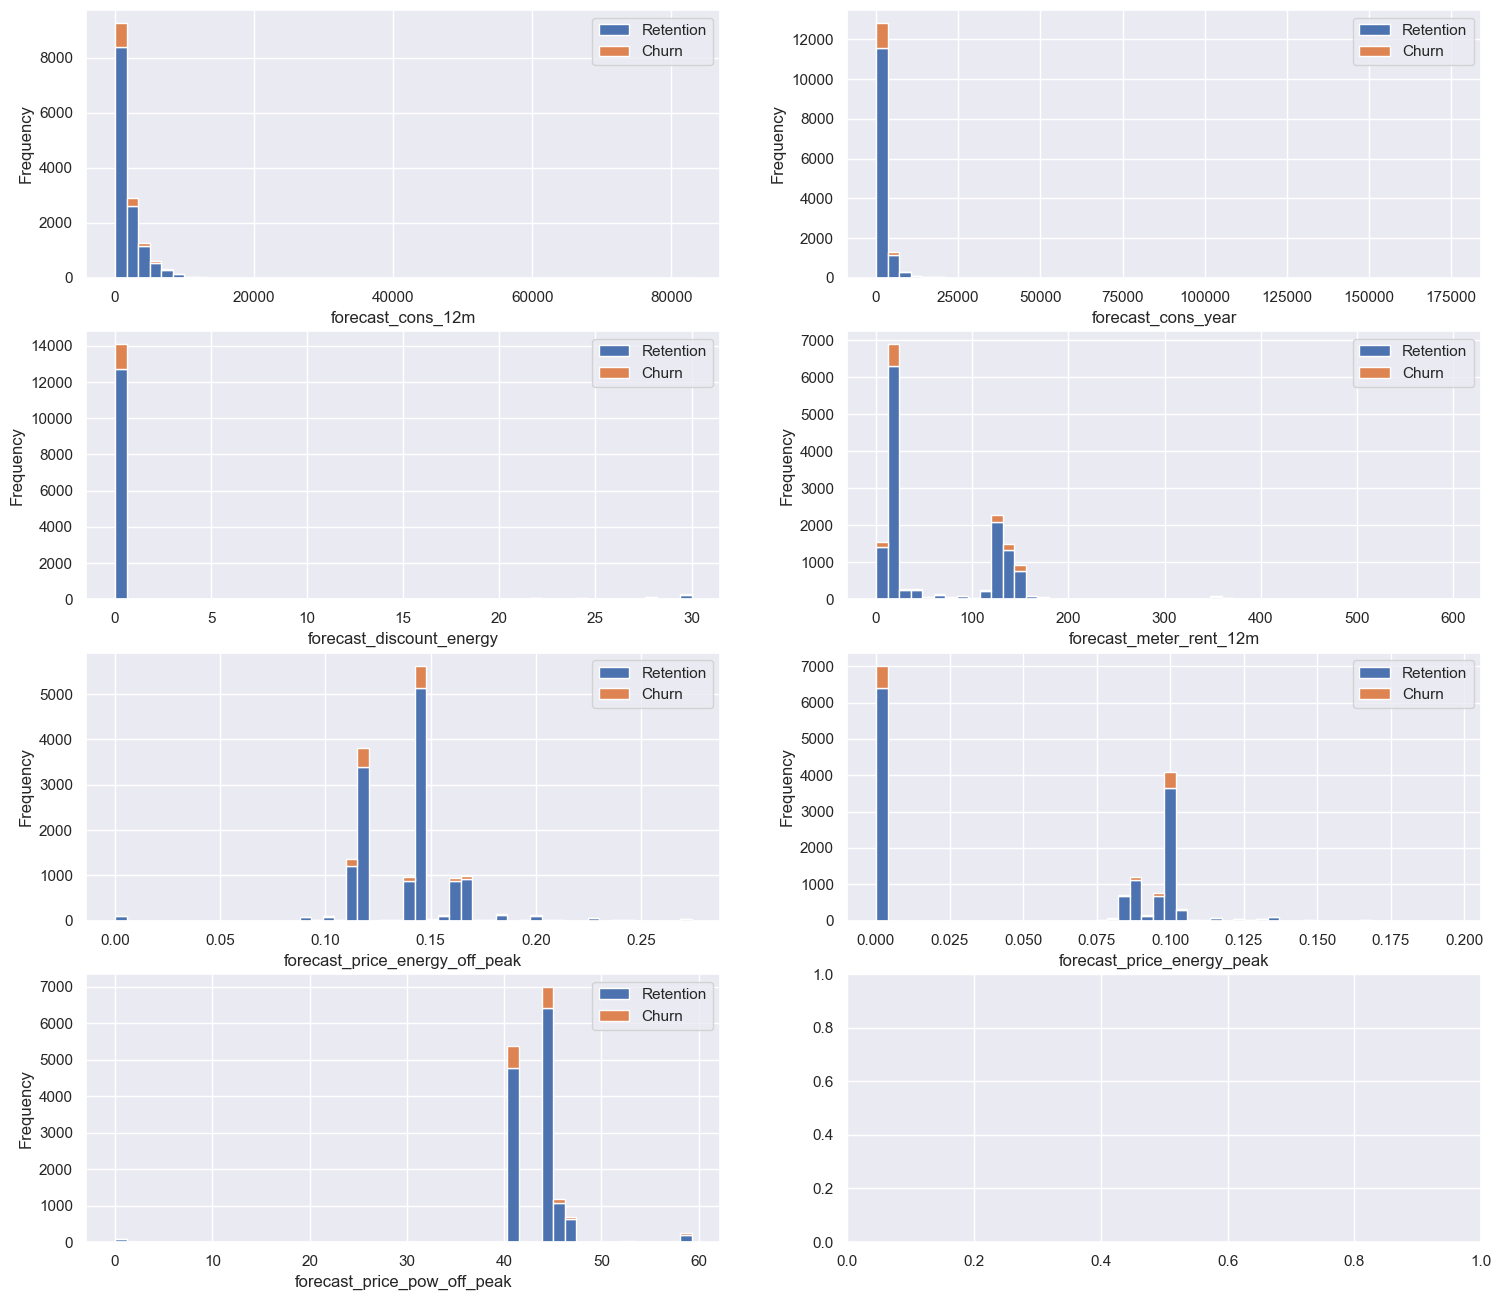

In [64]:
# forecast
forecast = client_df[['id','forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','churn']]
fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(18, 16))

plot_distribution(forecast, 'forecast_cons_12m', axs[0,0])
plot_distribution(forecast, 'forecast_cons_year', axs[0,1])
plot_distribution(forecast, 'forecast_discount_energy', axs[1,0])
plot_distribution(forecast, 'forecast_meter_rent_12m', axs[1,1])
plot_distribution(forecast, 'forecast_price_energy_off_peak', axs[2,0])
plot_distribution(forecast, 'forecast_price_energy_peak', axs[2,1])
plot_distribution(forecast, 'forecast_price_pow_off_peak', axs[3,0])

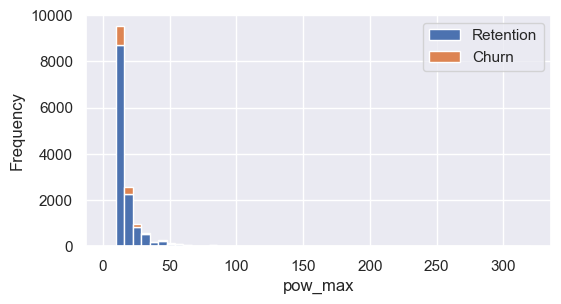

In [69]:
# subscribed power
power = client_df[["id", "pow_max", "churn"]]

fig, axs = plt.subplots(nrows=1, figsize=(6,3))
plot_distribution(power, 'pow_max', axs)

**Bivariate Analysis**

Text(0, 0.5, 'Company base(%)')

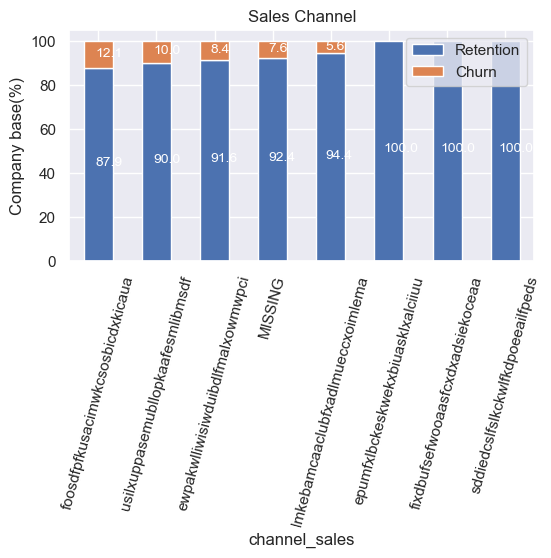

In [74]:
# cat - cat
# channel and churn
channel=client_df[['id', 'channel_sales', 'churn']]

#使用 unstack 方法将分组结果从长格式（每行一个组合）转换为宽格式。level=1 表示将第二级索引（churn 列）转换为列索引，从而创建一个透视表
#由于某些 channel_sales 和 churn 组合可能没有数据，结果中会出现缺失值，使用 fillna(0) 将这些缺失值替换为 0
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)

#channel.sum(axis=1) 表示沿着行的方向（每个类别）对 DataFrame 进行求和，得到每个类别的总数。然后通过除以总数，计算每个类别的百分比
#这部分代码相当于将每个类别的数量除以总数，得到每个类别的百分比
#by=[1] 表示按照第二列（即churn）进行排序
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

ax=channel_churn.plot(kind='bar',stacked=True,figsize=(6,3),rot=75)
annotate_stacked_bars(ax, textsize=10)
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

There are 5 Sale channels having churn rate.

Text(0, 0.5, 'Company base(%)')

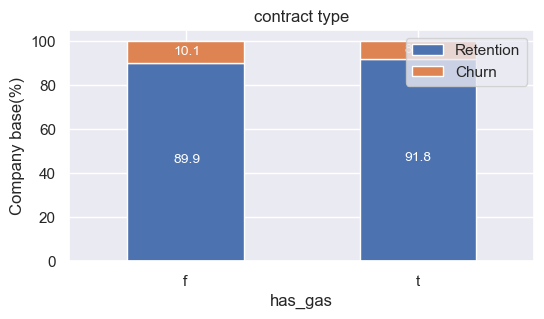

In [77]:
# cat - cat
# contract type and churn
contract= client_df[['id','has_gas','churn']]
contract = contract.groupby([contract['has_gas'], contract['churn']])['id'].count().unstack(level=1).fillna(0)
contract_churn=(contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

ax=contract_churn.plot(kind='bar',stacked=True,figsize=(6,3),rot=0)
annotate_stacked_bars(ax, textsize=10)
plt.title('contract type')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

Text(0, 0.5, 'Company base(%)')

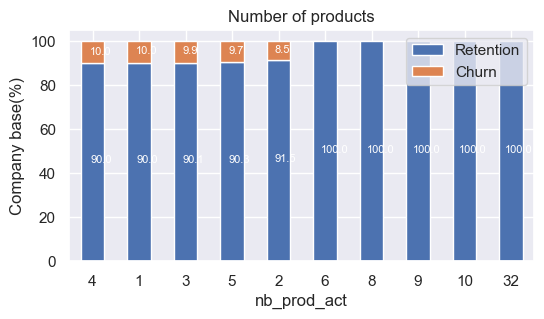

In [86]:
# cat - cat
# product
product = client_df[['id', 'nb_prod_act', 'churn']]
product = other_cols.groupby([product['nb_prod_act'], product['churn']])['id'].count().unstack(level=1)
product_churn = (product.div(product.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

ax=product_churn.plot(kind='bar',stacked=True,figsize=(6,3),rot=0)
annotate_stacked_bars(ax, textsize=8)
plt.title('Number of products')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

Text(0, 0.5, 'Company base(%)')

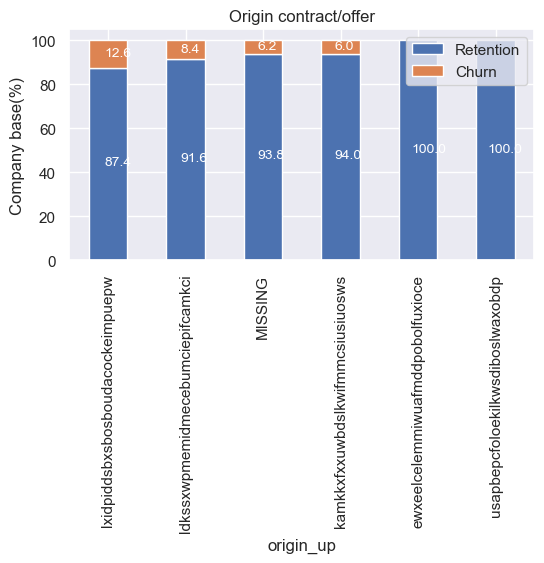

In [91]:
origin = client_df[['id', 'origin_up', 'churn']]
origin = origin.groupby([origin["origin_up"], origin["churn"]])["id"].count().unstack(level=1)
origin_churn = (origin.div(origin.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

ax=origin_churn.plot(kind='bar',stacked=True,figsize=(6,3),rot=90)
annotate_stacked_bars(ax, textsize=10)
plt.title('Origin contract/offer')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

Text(0, 0.5, 'Company base(%)')

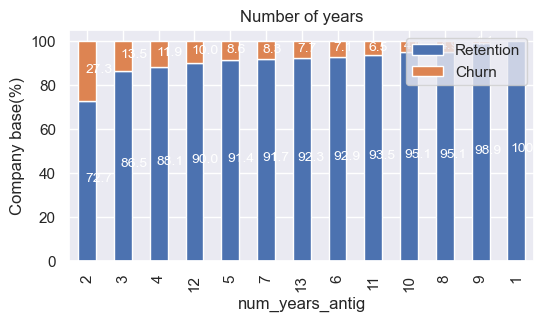

In [92]:
num_years_antig = client_df[['id', 'num_years_antig', 'churn']]
num_years_antig = num_years_antig.groupby([num_years_antig['num_years_antig'], num_years_antig["churn"]])["id"].count().unstack(level=1)
num_years_antig_churn = (num_years_antig.div(num_years_antig.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

ax=num_years_antig_churn.plot(kind='bar',stacked=True,figsize=(6,3),rot=90)
annotate_stacked_bars(ax, textsize=10)
plt.title('Number of years')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

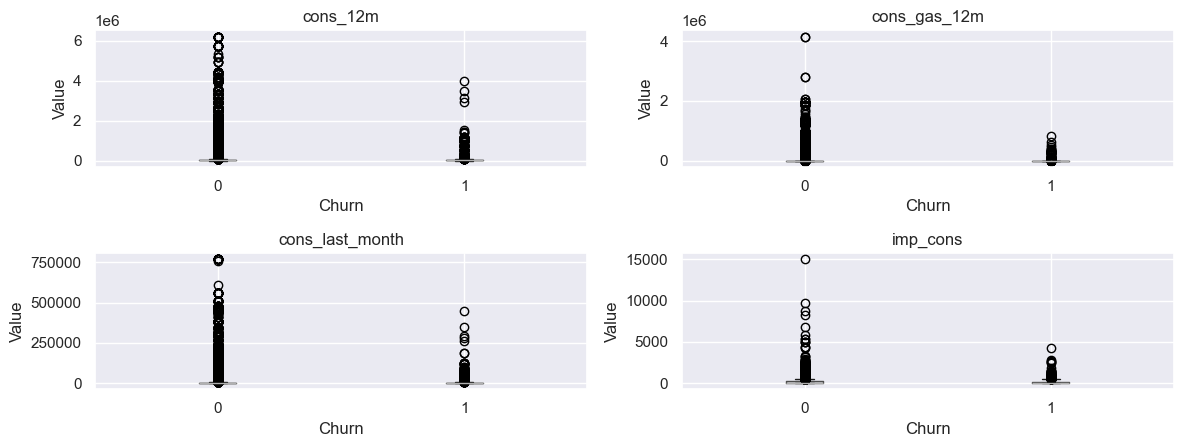

In [59]:
# num - cat
# consumption - churn
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12, 5))

columns = ["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]

for ax, col in zip(axs.flat, columns):
    client_df.boxplot(column=col, by='churn', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Churn')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.suptitle('')
plt.show()

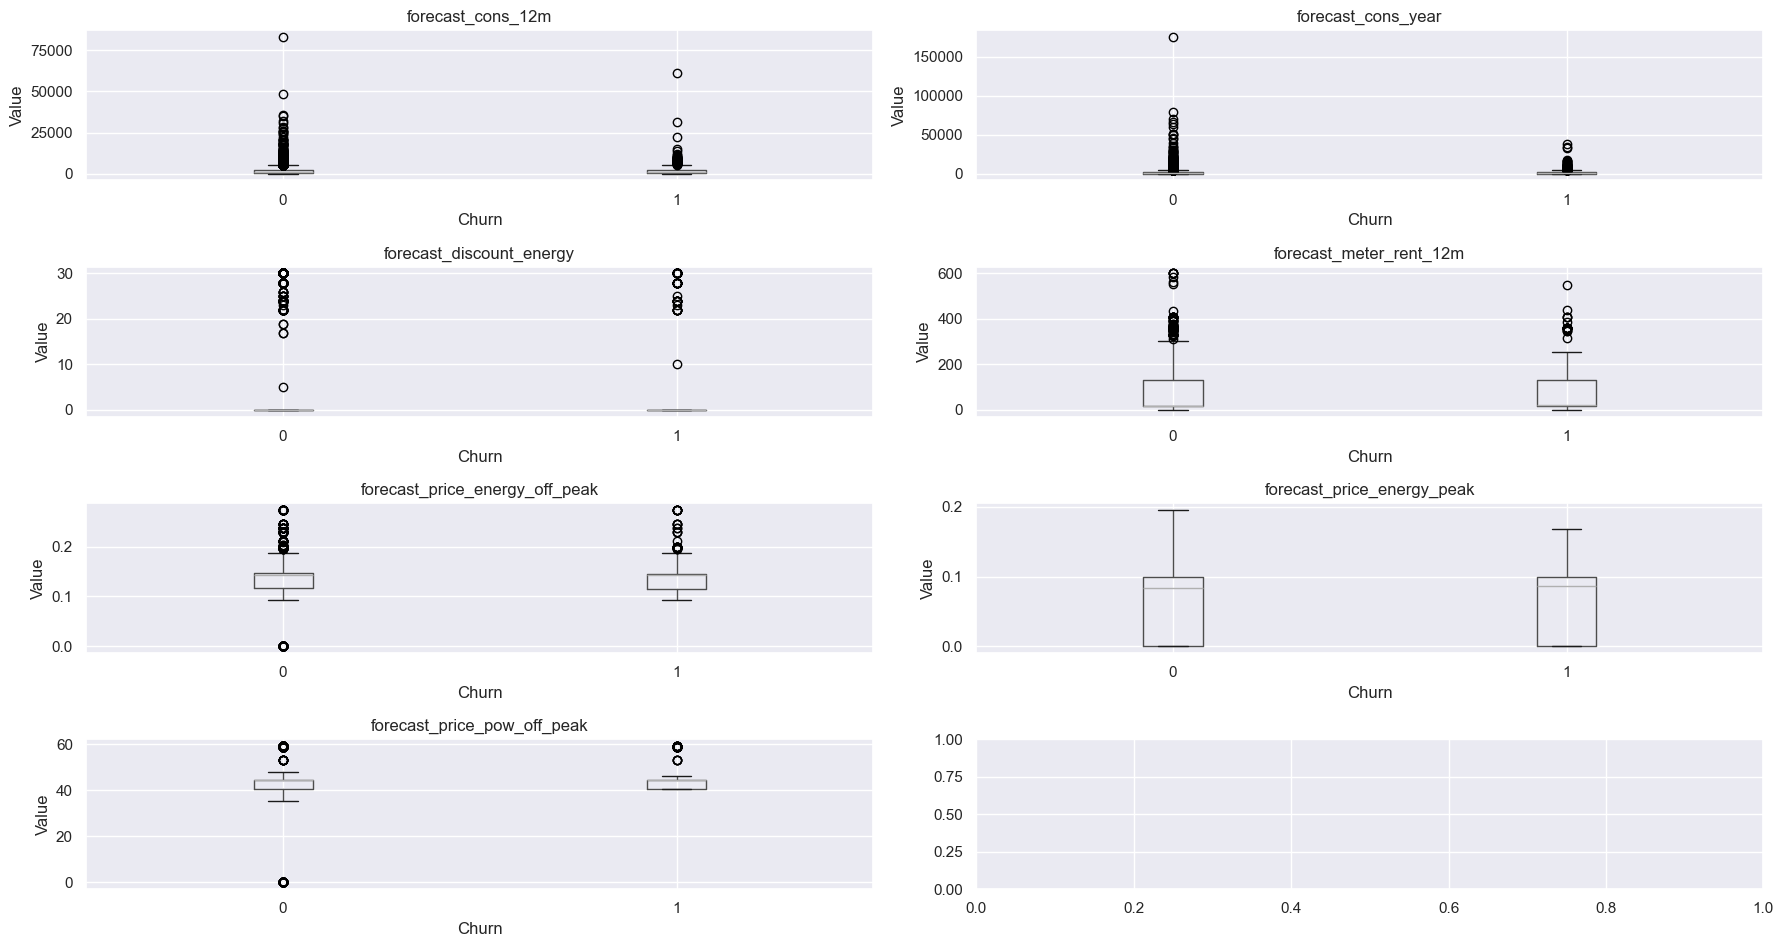

In [81]:
# num - cat
# forecast
forecast = client_df[['id','forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','churn']]
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(18, 10))

columns = ['forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']

for ax, col in zip(axs.flat, columns):
    client_df.boxplot(column=col, by='churn', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Churn')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.suptitle('')
plt.show()

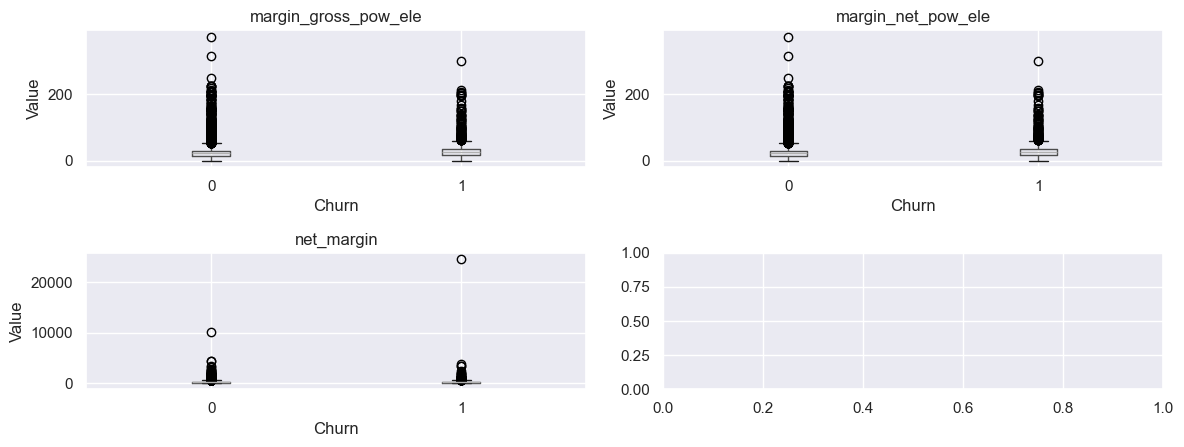

In [80]:
# num - cat
# margin & churn
margin = client_df[['margin_gross_pow_ele','margin_net_pow_ele','net_margin']]
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,5))

columns = ['margin_gross_pow_ele','margin_net_pow_ele','net_margin']

for ax, col in zip(axs.flat, columns):
    client_df.boxplot(column=col, by='churn', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Churn')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.suptitle('')
plt.show()

**for price dataset**

Most customers have a 12-month price records each.

In [97]:
# 有15990个id出现了12次（一年）
price_df['id'].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

In [94]:
price_df['price_date'].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

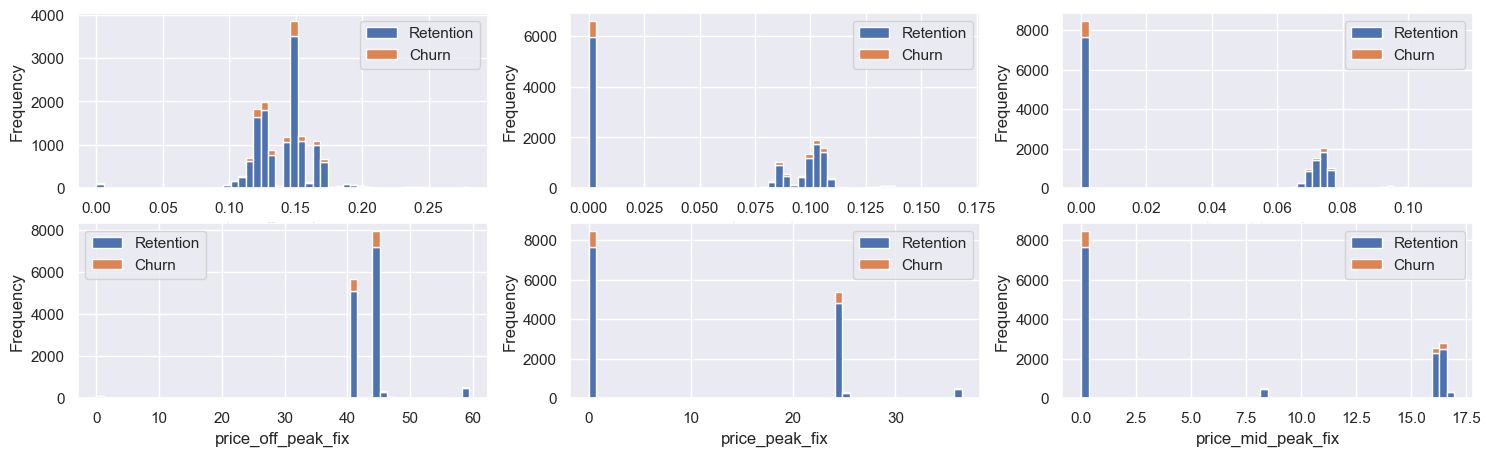

In [13]:
# numeric distribution
price_churn = price_df.copy() 
price_churn['churn'] = consumption['churn']

price = price_churn[['price_off_peak_var', 'price_peak_var','price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix','churn']]
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(18, 5))

plot_distribution(price, 'price_off_peak_var', axs[0,0])
plot_distribution(price, 'price_peak_var', axs[0,1])
plot_distribution(price, 'price_mid_peak_var', axs[0,2])
plot_distribution(price, 'price_off_peak_fix', axs[1,0])
plot_distribution(price, 'price_peak_fix', axs[1,1])
plot_distribution(price, 'price_mid_peak_fix', axs[1,2])

**Hypothesis Investigation**

Price Sensitivity - when the price increases and some customers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn

In [118]:
# Create mean average data (the average of the year, the last 6 months and the last 3 months; for 2015)
numeric_cols = price_df.select_dtypes(include='number').columns

mean_year = price_df.groupby('id')[numeric_cols].mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id'])[numeric_cols].mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id'])[numeric_cols].mean().reset_index()

In [121]:
#rename the columns
mean_year = mean_year.rename(
    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_6m = mean_6m.rename(
    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_3m = mean_3m.rename(
    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)

In [157]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

# Merge the churn factor into price features
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0.123007,0.104108,0.075469,40.728885,24.437330,16.291555,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,ffebf6a979dd0b17a41076df1057e733,0.122426,0.102375,0.072210,40.606699,24.364017,16.242678,0.118442,0.100477,0.072089,40.647429,24.388454,16.258969,0.115916,0.099461,0.071884,40.728885,24.43733,16.291555,0
14601,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,0
14602,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555,0
14603,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,0


In [159]:
numeric_cols = price_churn.select_dtypes(include='number').columns
corr = price_churn[numeric_cols].corr()

the correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change.

In [160]:
corr

,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,churn
mean_year_price_off_peak_var,1.000000,-0.317958,-0.609064,0.662072,-0.631623,-0.609174,0.989279,-0.306751,-0.606646,0.666810,-0.630424,-0.608003,0.973521,-0.301290,-0.604840,0.662635,-0.628561,-0.606208,-0.006395
mean_year_price_peak_var,-0.317958,1.000000,0.822505,-0.211433,0.810721,0.815743,-0.326335,0.998134,0.820997,-0.212810,0.809306,0.814468,-0.328800,0.994326,0.818249,-0.216367,0.806987,0.811964,0.029604
mean_year_price_mid_peak_var,-0.609064,0.822505,1.000000,-0.288073,0.987690,0.991544,-0.613394,0.814347,0.998234,-0.290172,0.986248,0.990285,-0.614994,0.808208,0.994841,-0.293402,0.983359,0.987177,0.046528
mean_year_price_off_peak_fix,0.662072,-0.211433,-0.288073,1.000000,-0.228602,-0.332554,0.637502,-0.207418,-0.286749,0.997116,-0.226938,-0.331113,0.622574,-0.205062,-0.285971,0.986470,-0.226456,-0.329999,0.016807
mean_year_price_peak_fix,-0.631623,0.810721,0.987690,-0.228602,1.000000,0.974095,-0.635706,0.802110,0.985666,-0.231288,0.998610,0.972826,-0.636430,0.796047,0.982357,-0.235500,0.995571,0.969747,0.047224
mean_year_price_mid_peak_fix,-0.609174,0.815743,0.991544,-0.332554,0.974095,1.000000,-0.615053,0.807061,0.989552,-0.334324,0.972444,0.998559,-0.616945,0.800909,0.986396,-0.336869,0.969683,0.995447,0.044825
mean_6m_price_off_peak_var,0.989279,-0.326335,-0.613394,0.637502,-0.635706,-0.615053,1.000000,-0.313381,-0.610949,0.647616,-0.635623,-0.614990,0.990467,-0.307330,-0.609312,0.644399,-0.634318,-0.613755,-0.007564
mean_6m_price_peak_var,-0.306751,0.998134,0.814347,-0.207418,0.802110,0.807061,-0.313381,1.000000,0.815235,-0.208308,0.802523,0.807681,-0.315384,0.997164,0.813224,-0.212047,0.800745,0.805726,0.028895
mean_6m_price_mid_peak_var,-0.606646,0.820997,0.998234,-0.286749,0.985666,0.989552,-0.610949,0.815235,1.000000,-0.288881,0.987061,0.991195,-0.612725,0.809807,0.997501,-0.292290,0.984901,0.988803,0.046225
mean_6m_price_off_peak_fix,0.666810,-0.212810,-0.290172,0.997116,-0.231288,-0.334324,0.647616,-0.208308,-0.288881,1.000000,-0.229648,-0.333012,0.633483,-0.206097,-0.288224,0.990163,-0.229206,-0.332070,0.016906


In [162]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')
churn_data.to_csv('clean_data_modeling.csv')